In [1]:
## This script is to plot CSI, POD, FAR generated by CSIPODFAR_3h_evaluations.ipynb
## field significance is generated by statsignif_rainnc_step1.m and statsignif_rainnc_step2.m
## for 21-00, 00-03, 03-06, 18 total
## Created by C. Bayu Risanto, S.J. (3 October 2024)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from numpy import matlib
import pandas as pd
import os
from os.path import exists
import xarray as xr
from scipy.io import loadmat,savemat 
from datetime import date, datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mplotcolors
import matplotlib as mp
from matplotlib import cm
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
## read data .mat 3 hourly!!!!!!
link = '/net/brisa/br1/castrogroup/bayu/UA-WRF/ARIZONA_PRO/WRF_EXTR'
dir_in = link+'/'+'CSIPODFAR_AZ+'
peri = ['21-00','00-03','03-06']
thrss = [3.6,3.4,2.9]
CSI_3d = []; POD_3d = []; FAR_3d = []; CSI_3n = []; POD_3n = []; FAR_3n = []; sig_3a = []
c = 0
for i in peri:
    thrs = str('%3.1f' % thrss[c])
    fDA = 'CSIPODFAR_'+f'{i}'+'-RAINNC_assim_NV25_thr'+thrs+'.mat'
    fNO = 'CSIPODFAR_'+f'{i}'+'-RAINNC_noassim_NV25_thr'+thrs+'.mat'
    ## get data
    da = loadmat(dir_in+'/'+fDA)
    C_d = da['CSI']
    P_d = da['POD']
    F_d = da['FAR']
    no = loadmat(dir_in+'/'+fNO)
    C_n = no['CSI']
    P_n = no['POD']
    F_n = no['FAR']

    ## read field significance
    dir_s = link+'/'+'FIELDSIGNIF_AZ+'
    fs = 'signif_field_'+f'{i[0:2]}'+f'{i[3:5]}'+'_rainfall_'+thrs+'.mat'

    ## get field significant
    FS = loadmat(dir_s+'/'+fs)
    sig = FS['signif']    
    
    CSI_3d.append(C_d); POD_3d.append(P_d); FAR_3d.append(F_d); CSI_3n.append(C_n); POD_3n.append(P_n); FAR_3n.append(F_n)
    sig_3a.append(sig)
    c += 1
CSI_3d = np.asarray(CSI_3d); POD_3d = np.asarray(POD_3d); FAR_3d = np.asarray(FAR_3d)
CSI_3n = np.asarray(CSI_3n); POD_3n = np.asarray(POD_3n); FAR_3n = np.asarray(FAR_3n); sig_3a = np.squeeze(np.asarray(sig_3a))

In [3]:
## read data .mat TOTAL RAIN!!!!!!
peri = '18'
threshold = 9.4
thrs = str(threshold)
fDA = 'CSIPODFAR_RAINNC_assim_NV25_thr'+thrs+'.mat'
fNO = 'CSIPODFAR_RAINNC_noassim_NV25_thr'+thrs+'.mat'

## get data
da = loadmat(dir_in+'/'+fDA)
CSI_Td = da['CSI']
POD_Td = da['POD']
FAR_Td = da['FAR']

no = loadmat(dir_in+'/'+fNO)
CSI_Tn = no['CSI']
POD_Tn = no['POD']
FAR_Tn = no['FAR']

## read field significance
dir_s = link+'/'+'FIELDSIGNIF_AZ+'
thrss = str('%3.1f' % threshold)
fs = 'signif_field_'+peri+'_rainfall_'+thrss+'.mat'

## get field significant
FS = loadmat(dir_s+'/'+fs)
sig_Ta = FS['signif']

In [4]:
## combine them
ny,nx = CSI_Td.shape
CSI_td = CSI_Td.reshape(1,ny,nx); POD_td = POD_Td.reshape(1,ny,nx); FAR_td = FAR_Td.reshape(1,ny,nx)
CSI_tn = CSI_Tn.reshape(1,ny,nx); POD_tn = POD_Tn.reshape(1,ny,nx); FAR_tn = FAR_Tn.reshape(1,ny,nx)
CSI_d = np.vstack((CSI_3d,CSI_td)); POD_d = np.vstack((POD_3d,POD_td)); FAR_d = np.vstack((FAR_3d,FAR_td)) 
CSI_n = np.vstack((CSI_3n,CSI_tn)); POD_n = np.vstack((POD_3n,POD_tn)); FAR_n = np.vstack((FAR_3n,FAR_tn)) 
sig_ta = sig_Ta.reshape(1,3)
sig = np.vstack((sig_3a,sig_ta)); sig = sig.flatten()

In [5]:
## calculate difference
dif_CSI = CSI_d - CSI_n
dif_POD = POD_d - POD_n
#dif_FAR = -1*(FAR_d - FAR_n)
dif_FAR = (1-FAR_d)-(1-FAR_n)
d_FAR = (FAR_d - FAR_n)

In [6]:
## calculate mean
md_CSI = []; md_POD = []; md_FAR = []
for i in range(4):
    m_CSI = np.nanmean(dif_CSI[i,:,:].flatten()) ; #print(md_CSI)
    m_POD = np.nanmean(dif_POD[i,:,:].flatten()) ; #print(md_POD)
    m_FAR = np.nanmean(d_FAR[i,:,:].flatten()) ; #print(md_FAR)
    md_CSI.append(m_CSI); md_POD.append(m_POD); md_FAR.append(m_FAR)
md_CSI = np.asarray(md_CSI); md_POD = np.asarray(md_POD); md_FAR = np.asarray(md_FAR)
md = np.asarray([md_CSI,md_POD,md_FAR]).flatten('F') ; print(md)

[0.02738931 0.05559481 0.01436425 0.03227378 0.08304244 0.04786933
 0.01327325 0.10534599 0.11088119 0.0757672  0.1829304  0.06922909]


In [7]:
## get latlon
linkwrf = '/net/brisa/br1/castrogroup/bayu/UA-WRF/ARIZONA_PRO/WRF_EXTR/regRAINNC'
ds = xr.open_dataset(linkwrf+'/'+'20210703_06Z_mc08_40mem_0035_6cyc_assim'+'/'+'RAINNC_d02_reg2MRMS.AZ+.nc')
lat = ds.lat[:]
lon = ds.lon[:]
xlon = np.matlib.repmat(lon,len(lat),1)
xlat = np.matlib.repmat(lat,len(lon),1).T

In [8]:
## get contour hgt
ds = xr.open_dataset('/net/haze/ha1/jmoker/bayu/HGT_d01.nc')
HGT = ds.HGT[0,:,:]
XLAT = ds.XLAT[0,:,:]
XLON = ds.XLONG[0,:,:]

## get rid of anything less than 0 m
HGT = HGT.where(HGT >= 1)

In [9]:
## get obs data 227 is AUG 15
obs_link = '/net/brisa/br1/castrogroup/bayu/UA-WRF/ARIZONA_PRO/DATA/GPS_2021/GPS_DAVID-SUOMI_hr-ORI/'
fobs = 'TransDS_hr_2021'+'08'+'15'+'18'+'.dat'
d_obs = pd.read_csv(obs_link+fobs,header=None,delimiter=r"\s+")
sta = d_obs.iloc[:,0].tolist()

In [10]:
## get the obs lat lon
obslatlon_link = '/net/brisa/br1/castrogroup/bayu/UA-WRF/ARIZONA_PRO/metadata/'
flatlon = 'GPS_DAVID-SUOMI_sites_2021.txt'
latlon = pd.read_csv(obslatlon_link+flatlon,header=None,delimiter=r"\s+")
n_latlon = latlon[latlon.iloc[:,3].isin(sta)]
Olon = n_latlon.iloc[:,0].tolist()
Olat = n_latlon.iloc[:,1].tolist()
Oname = n_latlon.iloc[:,3].tolist()

In [11]:
xticks = np.arange(-114.,-108,2)
yticks = np.arange(31.,38.,1)
## create background
crs = ccrs.PlateCarree()
def plot_background(ax):
    ax.set_extent([-115.,-109.,31.5,37.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=1.4,zorder=3)
    #ax.add_feature(cfeature.BORDERS,linestyle=':',linewidth=0.7,zorder=3)
    ax.add_feature(cfeature.STATES,linestyle=':',linewidth=0.7,zorder=3)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.set_xticklabels(xticks, rotation=0, fontsize=12)
    ax.set_yticklabels(yticks, rotation=0, fontsize=12)
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.contour(XLON,XLAT,HGT,6,vmin=0,vmax=2500,colors='k',linewidths=0.6)
    
    gl = ax.gridlines(ccrs.PlateCarree(),draw_labels=False,linewidth=2,color='gray',
                     alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xlines = False; gl.ylines = False
    gl.xlocator = mticker.FixedLocator(xticks)
    gl.ylocator = mticker.FixedLocator(yticks)
    
    return ax

In [12]:
## color
var_diff = np.arange(-1, 1.1, 0.1)
var_diff = np.arange(-0.6, 0.7, 0.1)

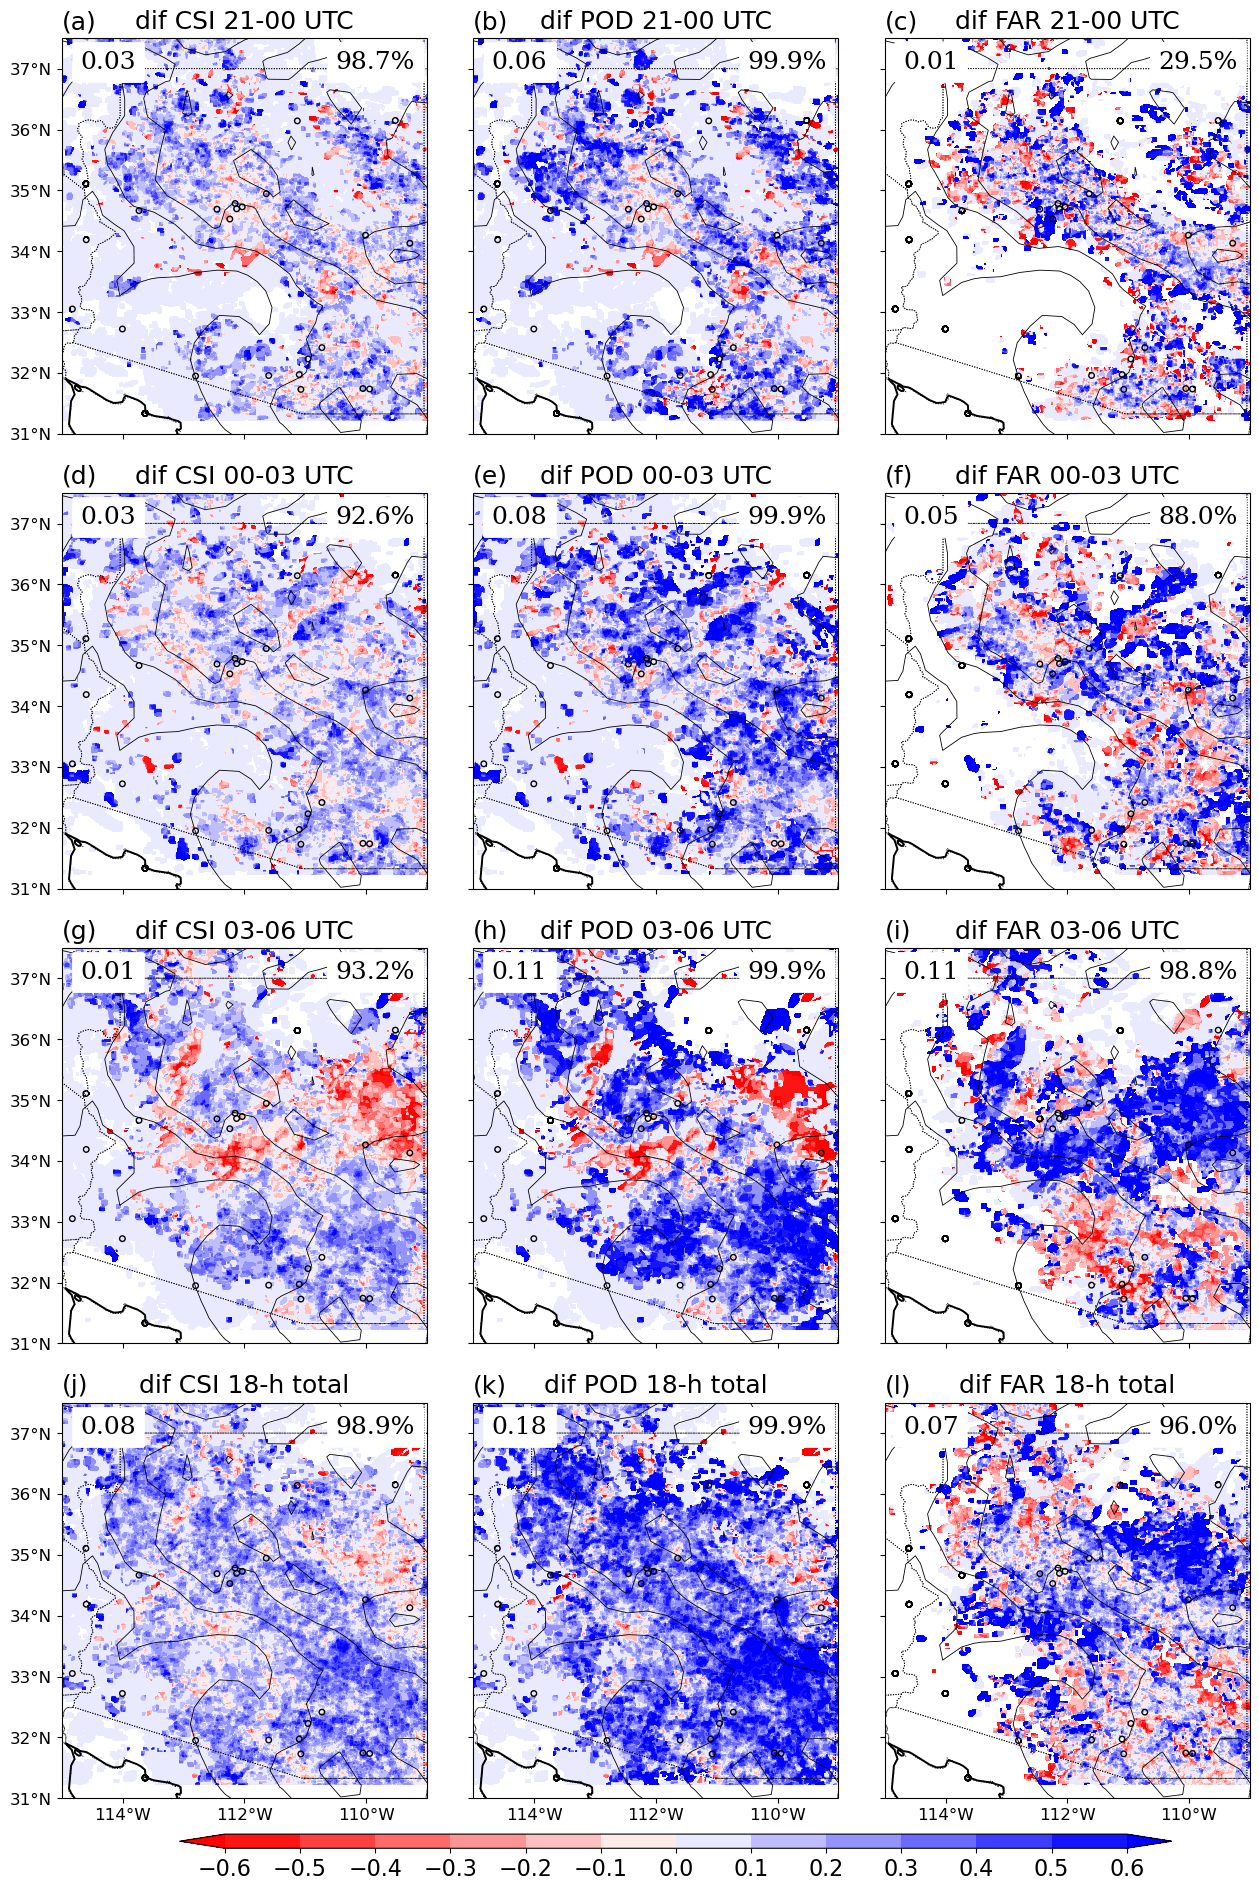

In [13]:
###########################################
# Plot #           
###########################################
period = ['21-00','00-03','03-06','18-h total']
alph = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)']
projection = ccrs.PlateCarree()
fig, axe = plt.subplots(4, 3, figsize=(16, 22),
                                   subplot_kw={'projection': projection})
## AX1
axlist = axe.flatten()
for ax1 in axlist:
    plot_background(ax1)
    cn = 0
    for i in range(4):
        p0 = axlist[cn+0].contourf(xlon,xlat,dif_CSI[i,:,:],
                           var_diff,cmap='bwr_r',extend='both',transform=projection,) 
        p1 = axlist[cn+1].contourf(xlon,xlat,dif_POD[i,:,:],
                           var_diff,cmap='bwr_r',extend='both',transform=projection,)  
        p2 = axlist[cn+2].contourf(xlon,xlat,d_FAR[i,:,:],
                           var_diff,cmap='bwr_r',extend='both',transform=projection,)
        cn = cn + 3
    ## set title
    cm = 0
    for ip in period:
        t0 = axlist[cm+0].set_title('dif CSI '+f'{ip}'+' UTC',
                            loc='center',pad=7,fontsize=18)
        t1 = axlist[cm+1].set_title('dif POD '+f'{ip}'+' UTC',
                            loc='center',pad=7,fontsize=18)
        t2 = axlist[cm+2].set_title('dif FAR '+f'{ip}'+' UTC',
                            loc='center',pad=7,fontsize=18)
        if cm >= 9:
            t0 = axlist[cm+0].set_title('dif CSI '+f'{ip}',
                            loc='center',pad=7,fontsize=18)
            t1 = axlist[cm+1].set_title('dif POD '+f'{ip}',
                            loc='center',pad=7,fontsize=18)
            t2 = axlist[cm+2].set_title('dif FAR '+f'{ip}',
                            loc='center',pad=7,fontsize=18)
        cm = cm + 3

    ## obs
    for iob in range(12):
        s0 = axlist[iob].scatter(Olon,Olat,s=16,edgecolor='k')
        s0.set_facecolor('none')
    
    ## annotate
        axlist[iob].annotate(str(sig[iob])+'%',(-110.5,37),fontsize=18, fontname='serif',
            bbox=dict(boxstyle='square',fc='w',ec='w'))
        axlist[iob].annotate(str(np.round(md[iob],2)),(-114.7,37),fontsize=18, fontname='serif',
            bbox=dict(boxstyle='square',fc='w',ec='w'))
    
    for ip in range(len(alph)):
        axlist[ip].set_title(alph[ip],loc='left',pad=7,fontsize=18)

    ## remove xaxis
    [axlist[c].set_xticklabels([]) for c in range(12) if c<=8 ]
    [axlist[c].set_yticklabels([]) for c in range(12) if c!=0 and c!=3 and c!=6 and c!=9 ]

#Add precip colorbar
cbar1 = fig.colorbar(p2,ticks=var_diff,ax=axe,orientation='horizontal',
                    shrink=0.8,aspect=70,pad=0.01,anchor=(0.5,-0.3))
cbar1.ax.tick_params(labelsize=16)
#cbar1.set_label('5x5 eval',fontsize=16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=-0.1, 
                    hspace= 0.15)

## SAVE
dir_out = '/home/bayu/Documents/ARIZONA-WRF/PLOTS/CSIPODFAR_RAINNC/'
plotfile  = 'CSIPODFAR_5x5_RAIN-21-00-03-T.png'
sf = fig.savefig(dir_out+plotfile, dpi=300, bbox_inches='tight')

## CLOSE
plt.show()
plt.close()